# K Nears Neigbhor

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mencari nilai K optimal menggunakan GridSearchCV
param_grid = {'n_neighbors': range(1, 11)}  # Mencoba nilai K dari 1 hingga 10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Menggunakan 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Menampilkan nilai K optimal
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K={optimal_k}")

# Membuat model KNN dengan K optimal
knn_model = KNeighborsClassifier(n_neighbors=#optimal_k
                                3)  # Menggunakan K=3
knn_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

Confusion Matrix:
[[ 97 347 147]
 [  1 580  10]
 [  3 120 468]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.96      0.16      0.28       591
      Netral       0.55      0.98      0.71       591
     Positif       0.75      0.79      0.77       591

    accuracy                           0.65      1773
   macro avg       0.75      0.65      0.59      1773
weighted avg       0.75      0.65      0.59      1773


Cross-Validation Scores:
[0.56401579 0.57473209 0.64241399 0.75747321 0.67287084]
Mean Cross-Validation Score: 0.6423
Standard Deviation of Cross-Validation Scores: 0.0706


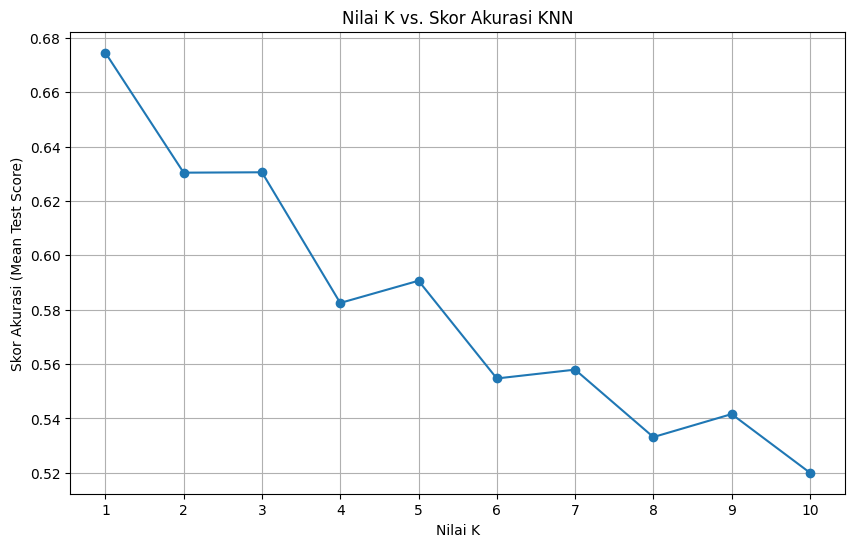

In [17]:
import matplotlib.pyplot as plt

# Mendapatkan skor rata-rata untuk setiap nilai K dari hasil GridSearchCV
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 11)  # Nilai K yang diuji

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Nilai K vs. Skor Akurasi KNN')
plt.xlabel('Nilai K')
plt.ylabel('Skor Akurasi (Mean Test Score)')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu X
plt.grid(True)
# plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
# plt.legend()
plt.show()

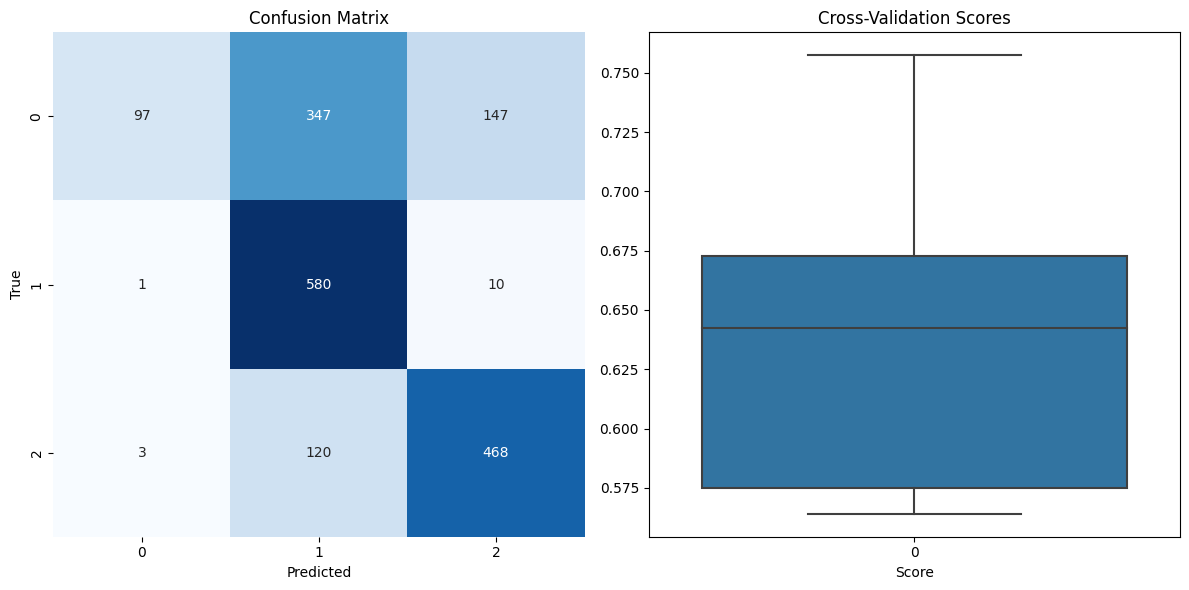

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

In [19]:
import joblib

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# # Save the model
# joblib.dump(knn_model, 'HASIL-RISET/knn_model.pkl')  # Save the model to a file
with open('model-knn.pkl', 'wb') as file:
    joblib.dump(knn_model, file)

# Save evaluation results
results_knn = {
    'Confusion Matrix': [conf_matrix.flatten()], # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df_knn = pd.DataFrame(results_knn)
results_df_knn.to_csv('HASIL-RISET/evaluation_results_knn-new.csv', index=False)  # Save results to CSV

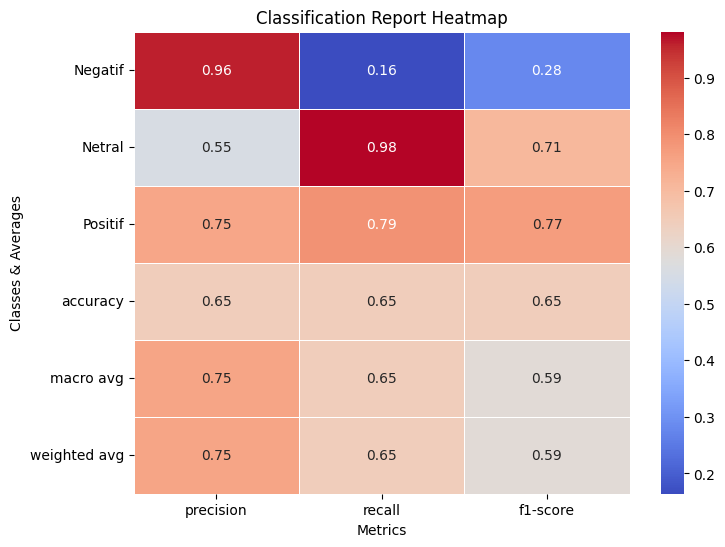

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mendapatkan classification report dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengonversi ke DataFrame untuk visualisasi
df_report = pd.DataFrame(report).T

# Menghapus support karena bukan metrik evaluasi
df_report = df_report.drop(columns=['support'])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.ylabel("Classes & Averages")
plt.xlabel("Metrics")
plt.show()

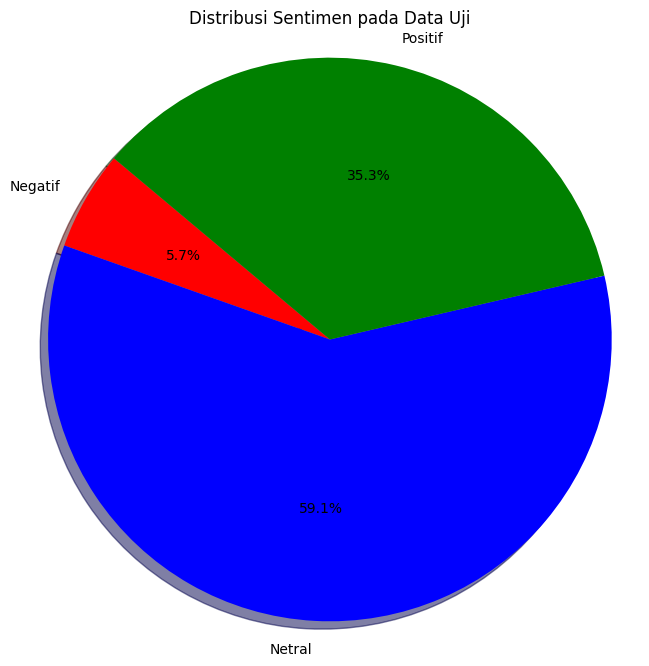

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# # Muat data uji
# X_test = pd.read_csv('HASIL-RISET/X_test.csv')

# # Muat model dari file joblib
# nb_model = joblib.load('HASIL-RISET/knn_model.pkl')

# Lakukan prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Ekspor hasil prediksi ke file CSV
predictions_df = pd.DataFrame(y_pred, columns=['predicted_label'])
predictions_df.to_csv('HASIL-RISET/predidct_KNN.csv', index=False)

# Hitung jumlah prediksi untuk setiap kelas
unique, counts = np.unique(y_pred, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Buat pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['red', 'blue', 'green']
# explode = (0.1, 0, 0)  # Hanya meledakkan bagian pertama (Negatif)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribusi Sentimen pada Data Uji')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
